In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, TheilSenRegressor, RANSACRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer
import scipy.stats as stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error, r2_score, mean_absolute_percentage_error

In [24]:
train = pd.read_csv('train.csv')
train

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,0.5500,0.4125,0.1625,1.715145,0.609514,0.396893,0.566990,4.0
1,1,F,1.5125,1.2125,0.4000,31.312023,13.395139,6.265239,8.930093,10.0
2,2,F,1.5125,1.1750,0.4125,31.552993,14.670866,6.279414,9.922325,11.0
3,3,I,0.8000,0.6000,0.2000,4.620969,3.019222,0.978058,1.417475,7.0
4,4,I,1.3875,1.0875,0.3625,24.323871,11.651644,5.712424,5.386405,8.0
...,...,...,...,...,...,...,...,...,...,...
14995,14995,M,1.3750,1.0625,0.3500,24.734939,11.169703,6.208540,6.095142,9.0
14996,14996,I,1.0750,0.8125,0.2500,12.998246,5.896696,2.338834,2.919999,7.0
14997,14997,I,1.3750,1.1125,0.3625,23.544260,8.674947,4.791066,7.796112,15.0
14998,14998,M,1.4375,1.1125,0.3500,28.448723,14.571643,6.279414,6.803880,10.0


In [4]:
test = pd.read_csv('test.csv')
test

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,15000,I,0.8625,0.6500,0.2250,5.854172,2.721552,1.048931,1.743494
1,15001,F,1.2875,1.0000,0.3250,20.326591,9.412034,4.578444,5.244657
2,15002,I,0.7000,0.5250,0.1500,2.820775,1.091456,0.666213,0.850485
3,15003,F,1.2625,0.9625,0.3375,18.710670,9.908150,4.521745,4.677668
4,15004,I,0.9125,0.6625,0.2250,5.060386,2.197086,1.176504,1.700970
...,...,...,...,...,...,...,...,...,...
9995,24995,I,1.3000,1.0000,0.3125,18.710670,8.348928,3.713785,5.386405
9996,24996,I,1.2500,0.9375,0.2750,14.755915,6.520385,2.849125,4.195726
9997,24997,M,1.5125,1.2625,0.4375,40.837455,18.866592,10.531839,9.780577
9998,24998,M,1.4500,1.0625,0.3375,28.689694,14.231449,5.570677,7.087375


In [5]:
subm = pd.read_csv('sample_submission.csv')
subm

,id,Age
0,15000,10
1,15001,10
2,15002,10
3,15003,10
4,15004,10
...,...,...
9995,24995,10
9996,24996,10
9997,24997,10
9998,24998,10


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              15000 non-null  int64  
 1   Sex             15000 non-null  object 
 2   Length          15000 non-null  float64
 3   Diameter        15000 non-null  float64
 4   Height          15000 non-null  float64
 5   Weight          15000 non-null  float64
 6   Shucked Weight  15000 non-null  float64
 7   Viscera Weight  15000 non-null  float64
 8   Shell Weight    15000 non-null  float64
 9   Age             15000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ MB


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   Sex             10000 non-null  object 
 2   Length          10000 non-null  float64
 3   Diameter        10000 non-null  float64
 4   Height          10000 non-null  float64
 5   Weight          10000 non-null  float64
 6   Shucked Weight  10000 non-null  float64
 7   Viscera Weight  10000 non-null  float64
 8   Shell Weight    10000 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 703.2+ KB


In [182]:
label_encoder = LabelEncoder()
train['Sex_LabelEncoded'] = label_encoder.fit_transform(train['Sex'])
train_onehot = pd.get_dummies(train, columns=['Sex'], prefix='Sex')

test['Sex_LabelEncoded'] = label_encoder.fit_transform(test['Sex'])
test_onehot = pd.get_dummies(test, columns=['Sex'], prefix='Sex')


In [128]:
test

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_LabelEncoded
0,15000,I,0.8625,0.6500,0.2250,5.854172,2.721552,1.048931,1.743494,1
1,15001,F,1.2875,1.0000,0.3250,20.326591,9.412034,4.578444,5.244657,0
2,15002,I,0.7000,0.5250,0.1500,2.820775,1.091456,0.666213,0.850485,1
3,15003,F,1.2625,0.9625,0.3375,18.710670,9.908150,4.521745,4.677668,0
4,15004,I,0.9125,0.6625,0.2250,5.060386,2.197086,1.176504,1.700970,1
...,...,...,...,...,...,...,...,...,...,...
9995,24995,I,1.3000,1.0000,0.3125,18.710670,8.348928,3.713785,5.386405,1
9996,24996,I,1.2500,0.9375,0.2750,14.755915,6.520385,2.849125,4.195726,1
9997,24997,M,1.5125,1.2625,0.4375,40.837455,18.866592,10.531839,9.780577,2
9998,24998,M,1.4500,1.0625,0.3375,28.689694,14.231449,5.570677,7.087375,2


In [183]:
cols = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Sex_LabelEncoded']
X = train[cols]
y = train['Age']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((10500, 8), (4500, 8))

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
MAE

np.float64(1.4113329870169784)

### Ridge

In [267]:
model = Ridge(alpha=1, solver='sag')
model.fit(X, y)

y_pred = model.predict(X)

MAE = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
MAE, r2

(np.float64(1.4254727804373013), 0.5890444566275015)

In [271]:
model = Ridge(alpha=1, solver='sag')

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and compute RMSE for each fold
mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

print("MAE scores for each fold: ",(mae_scores))
print("Mean MAE: ", np.mean(mae_scores))

MAE scores for each fold:  [1.35944584 1.41980317 1.48464336 1.41136432 1.43159972 1.44399768
 1.43622041 1.38314242 1.38640557 1.50599185]
Mean MAE:  1.4262614351083687


### Lasso

In [272]:
model = Lasso()
model.fit(X, y)

y_pred = model.predict(X)

MAE = mean_absolute_error(y, y)
r2 = r2_score(y, y_pred)
MAE, r2

(np.float64(0.0), 0.4405068726436653)

### ElasticNet

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = ElasticNet()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAE, r2

(np.float64(1.5778044649030563), 0.49650915824224295)

### Huber regressor

In [273]:
model = HuberRegressor()
model.fit(X, y)

y_pred = model.predict(X)

MAE = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
MAE, r2

(np.float64(1.3854849270535141), 0.5731711025836195)

In [91]:
model = HuberRegressor(max_iter=1000)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

print("MAE scores for each fold: ",(mae_scores))
print("Mean MAE: ", np.mean(mae_scores))

MAE scores for each fold:  [1.30333936 1.37981391 1.45266928 1.37072435 1.39814578 1.40910754
 1.40196118 1.32959165 1.33986324 1.4744017 ]
Mean MAE:  1.3859618004405385


### Theisen

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = TheilSenRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAE, r2

(np.float64(1.384395952987521), 0.5793861861465254)

In [85]:
model = TheilSenRegressor()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and compute RMSE for each fold
mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

print("MAE scores for each fold: ",(mae_scores))
print("Mean MAE: ", np.mean(mae_scores))

MAE scores for each fold:  [1.3192944  1.38359698 1.46456121 1.37812272 1.40721496 1.41857136
 1.41108246 1.35317743 1.35268349 1.48632442]
Mean MAE:  1.3974629432256476


### Ransac

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = RANSACRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAE, r2

(np.float64(1.626798915466371), 0.4568881961796011)

### Polynomial features

In [276]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias = False)
poly_features = polynomial_converter.fit(X)
poly_features = polynomial_converter.transform(X)

polymodel = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

polymodel.fit(X, y)

y_pred = polymodel.predict(X)

MAE = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
MAE, r2


(np.float64(1.4262646548021627), 0.589175430248364)

In [214]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias = False)
poly_features = polynomial_converter.fit(X)
poly_features = polynomial_converter.transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=0)

polymodel = Lasso()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

mae_scores = -cross_val_score(polymodel, X, y, cv=kf, scoring='neg_mean_absolute_error')

print("MAE scores for each fold: ",(mae_scores))
print("Mean MAE: ", np.mean(mae_scores))

'''
polymodel.fit(X_train, y_train)

y_pred = polymodel.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAE, r2
'''

MAE scores for each fold:  [1.61108803 1.65999412 1.76834189 1.64111175 1.71870446 1.69701813
 1.68645649 1.63179035 1.61512102 1.75057023]
Mean MAE:  1.6780196480286982


'\npolymodel.fit(X_train, y_train)\n\ny_pred = polymodel.predict(X_test)\n\nMAE = mean_absolute_error(y_test, y_pred)\nr2 = r2_score(y_test, y_pred)\nMAE, r2\n'

In [277]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias = False)
poly_features = polynomial_converter.fit(X)
poly_features = polynomial_converter.transform(X)

polymodel_huber = HuberRegressor(max_iter=5000)
polymodel_huber.fit(X, y)

y_pred_huber = polymodel_huber.predict(X)

MAE = mean_absolute_error(y, y_pred_huber)
r2 = r2_score(y, y_pred_huber)
MAE, r2

(np.float64(1.3850245816956668), 0.5744377190030081)

### Gridsearch

In [105]:
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ridge Regression with GridSearchCV
ridge = Ridge()

# Hyperparameters to tune
ridge_params = {
    'alpha': [0.1, 1.0, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}

# GridSearchCV
ridge_grid = GridSearchCV(ridge, 
                          ridge_params, 
                          cv=5, 
                          scoring='neg_mean_absolute_error')
ridge_grid.fit(X_train, y_train)

print("Best parameters for Ridge:", ridge_grid.best_params_)
print("Best cross-validation MAE for Ridge:", -ridge_grid.best_score_)

ridge_best = ridge_grid.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)
print("Test RMSE for Ridge:", mean_absolute_error(y_test, y_pred_ridge))


Best parameters for Ridge: {'alpha': 1.0, 'solver': 'sag'}
Best cross-validation MAE for Ridge: 1.4286150257644714
Test RMSE for Ridge: 1.4203733215478005


In [110]:
import warnings
warnings.filterwarnings('ignore')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ElasticNet with GridSearchCV
elasticnet = ElasticNet()

# Hyperparameters to tune
elasticnet_params = {
    'alpha': np.linspace(0.1, 1000, 1000),
    'l1_ratio': np.linspace(0.1, 1.0, 10),
}

# GridSearchCV
elasticnet_grid = GridSearchCV(elasticnet, 
                                     elasticnet_params, 
                                     cv=5, 
                                     scoring='neg_mean_absolute_error', 
                                    #  n_iter=10000, 
                                    #  random_state=42,
                                     n_jobs=8)
elasticnet_grid.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters for ElasticNet:", elasticnet_grid.best_params_)
print("Best cross-validation MAE for ElasticNet:", -elasticnet_grid.best_score_)

# Prediction and evaluation
elasticnet_best = elasticnet_grid.best_estimator_
y_pred_elasticnet = elasticnet_best.predict(X_test)
print("Test MAE for ElasticNet:", mean_absolute_error(y_test, y_pred_elasticnet))

Best parameters for ElasticNet: {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.1)}
Best cross-validation MAE for ElasticNet: 1.4764703034813196
Test MAE for ElasticNet: 1.4581956998644778


In [112]:
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the parameter grid for HuberRegressor
param_grid = {
    'epsilon': [1.1, 1.35, 1.5],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [2000, 4000, 5000],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Initialize the HuberRegressor
huber = HuberRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=huber, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=8)

# Fit the model
grid_search.fit(X_train, y_train)

print("Best parameters for ElasticNet:", grid_search.best_params_)
print("Best cross-validation MAE for ElasticNet:", -grid_search.best_score_)
# Get the best parameters and best score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

huber_best = grid_search.best_estimator_
y_pred_huber = huber_best.predict(X_test)
print("Test MAE for ElasticNet:", mean_absolute_error(y_test, y_pred_huber))

#best_params, best_score

Best parameters for ElasticNet: {'alpha': 0.0001, 'epsilon': 1.1, 'max_iter': 2000, 'tol': 0.0001}
Best cross-validation MAE for ElasticNet: 1.3972653927238161
Test MAE for ElasticNet: 1.3392837678053495


### RFECV

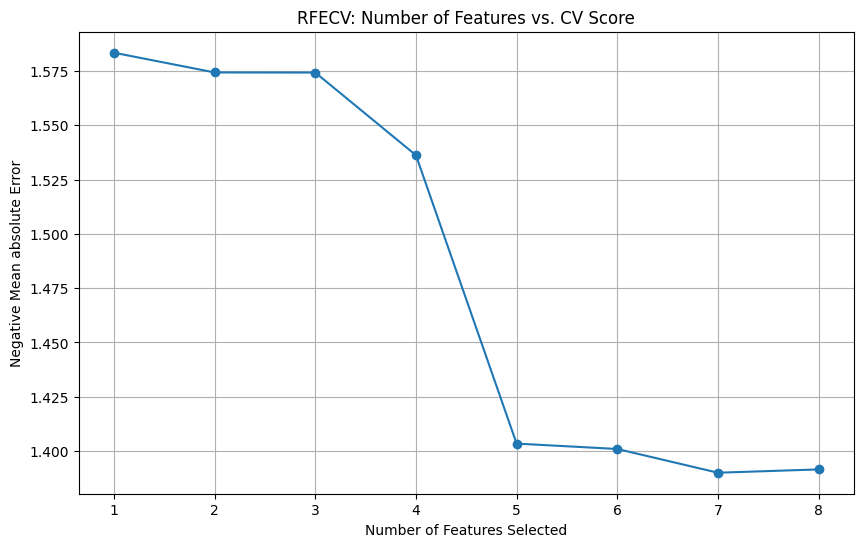

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Initialize the estimator
estimator = HuberRegressor()

# Set up RFECV
rfecv = RFECV(estimator=estimator, step=1, cv=5, scoring='neg_mean_absolute_error')

# Fit RFECV
rfecv.fit(X_train, y_train)

# Print the optimal number of features and their ranking
optimal_features = rfecv.n_features_
feature_ranking = rfecv.ranking_
important_features = rfecv.support_
# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), -rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Negative Mean absolute Error")
plt.title("RFECV: Number of Features vs. CV Score")
plt.grid(True)
plt.show()

### Blending

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

linear_pipeline = Pipeline([('scaler', StandardScaler()),
                            ('model', LinearRegression())])

ridge_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('model', Ridge(alpha=1.0))])

lasso_pipeline = Pipeline([('scaler', StandardScaler()),
                          ('model', Lasso(alpha=0.1))])

huber_pipeline = Pipeline([('scaler', StandardScaler()),
                          ('model', HuberRegressor())])

ransac_pipeline = Pipeline([('scaler', StandardScaler()),
                           ('model', RANSACRegressor())])

# Combine models using VotingRegressor for blending
voting_regressor = VotingRegressor(estimators=[
    ('linear', linear_pipeline),
    ('ridge', ridge_pipeline),
    ('lasso', lasso_pipeline),
    ('huber', huber_pipeline),
    ('ransac', ransac_pipeline)
])
'''
mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')

print("MAE scores for each fold: ",(mae_scores))
print("Mean MAE: ", np.mean(mae_scores))
'''

# Train the ensemble model
voting_regressor.fit(X_train, y_train)

y_pred_blend = voting_regressor.predict(X_test)

# Evaluate the blended predictions
rmse_blend = np.sqrt(mean_squared_error(y_test, y_pred_blend))
mae_blend = mean_absolute_error(y_test, y_pred_blend)
median_ae_blend = median_absolute_error(y_test, y_pred_blend)
mape_blend = mean_absolute_percentage_error(y_test, y_pred_blend)
r2_blend = r2_score(y_test, y_pred_blend)

# Store results for comparison
results_blend = {
    'Model': 'Blending (VotingRegressor)',
    'RMSE': rmse_blend,
    'MAE': mae_blend,
    'MedianAE': median_ae_blend,
    'MAPE': mape_blend,
    'R2': r2_blend
}

# Display the results
results_df = pd.DataFrame([results_blend])
results_df


,Model,RMSE,MAE,MedianAE,MAPE,R2
0,Blending (VotingRegressor),2.142818,1.394903,0.936629,0.132243,0.567282


### Stacking

In [278]:
# Define base models as pipelines
linear_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                            ('scaler', StandardScaler()),
                            ('model', LinearRegression())])
ridge_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                           ('scaler', StandardScaler()),
                           ('model', Ridge(alpha=1.0))])
lasso_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                           ('scaler', StandardScaler()),
                           ('model', Lasso(alpha=0.1))])
huber_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                           ('scaler', StandardScaler()),
                           ('model', HuberRegressor())])
ransac_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                            ('scaler', StandardScaler()),
                            ('model', RANSACRegressor())])

# Define the meta-model
meta_model = LinearRegression()

# Create the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('linear', linear_pipeline),
        ('ridge', ridge_pipeline),
        ('lasso', lasso_pipeline),
        ('huber', huber_pipeline),
        ('ransac', ransac_pipeline)
    ],
    final_estimator=meta_model,
    cv=5
)

# Train the stacking model
stacking_regressor.fit(X, y)


StackingRegressor(cv=5,
                  estimators=[('linear',
                               Pipeline(steps=[('poly', PolynomialFeatures()),
                                               ('scaler', StandardScaler()),
                                               ('model', LinearRegression())])),
                              ('ridge',
                               Pipeline(steps=[('poly', PolynomialFeatures()),
                                               ('scaler', StandardScaler()),
                                               ('model', Ridge())])),
                              ('lasso',
                               Pipeline(steps=[('poly', PolynomialFeatures()),
                                               ('scaler', StandardScaler()),
                                               ('model', Lasso(alpha=0.1))])),
                              ('huber',
                               Pipeline(steps=[('poly', PolynomialFeatures()),
                                               ('scaler', StandardScaler()),
                                               ('model', HuberRegressor())])),
                              ('ransac',
                               Pipeline(steps=[('poly', PolynomialFeatures()),
                                               ('scaler', StandardScaler()),
                                               ('model', RANSACRegressor())]))],
                  final_estimator=LinearRegression())

In [279]:
# Predict using the stacking model
y_pred_stack = stacking_regressor.predict(X)

# Evaluate the stacked predictions
rmse_stack = np.sqrt(mean_squared_error(y, y_pred_stack))
mae_stack = mean_absolute_error(y, y_pred_stack)
median_ae_stack = median_absolute_error(y, y_pred_stack)
mape_stack = mean_absolute_percentage_error(y, y_pred_stack)
r2_stack = r2_score(y, y_pred_stack)

# Store results for comparison
results_stack = {
    'Model': 'Stacking',
    'RMSE': rmse_stack,
    'MAE': mae_stack,
    'MedianAE': median_ae_stack,
    'MAPE': mape_stack,
    'R2': r2_stack
}

# Display the results
results_df = pd.DataFrame([results_stack])
results_df


,Model,RMSE,MAE,MedianAE,MAPE,R2
0,Stacking,1.976913,1.358958,0.962127,0.132797,0.619902


In [280]:

# Define base models as pipelines
linear_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                            ('scaler', StandardScaler()),
                            ('model', LinearRegression())])
ridge_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                           ('scaler', StandardScaler()),
                           ('model', Ridge(alpha=1.0))])
lasso_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                           ('scaler', StandardScaler()),
                           ('model', Lasso(alpha=0.1))])
huber_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                           ('scaler', StandardScaler()),
                           ('model', HuberRegressor())])
ransac_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                            ('scaler', StandardScaler()),
                            ('model', RANSACRegressor())])

# Define the meta-model
meta_model = HuberRegressor(alpha=0.0001)

# Create the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('linear', linear_pipeline),
        ('ridge', ridge_pipeline),
        ('lasso', lasso_pipeline),
        ('huber', huber_pipeline),
        ('ransac', ransac_pipeline)
    ],
    final_estimator=meta_model,
    cv=5,
    passthrough=True  # Include original features in the meta-model
)

# Train the stacking model
stacking_regressor.fit(X, y)

# Predict using the stacking model
y_pred_stack = stacking_regressor.predict(X)

# Evaluate the stacked predictions
rmse_stack = np.sqrt(mean_squared_error(y, y_pred_stack))
mae_stack = mean_absolute_error(y, y_pred_stack)
median_ae_stack = median_absolute_error(y, y_pred_stack)
mape_stack = mean_absolute_percentage_error(y, y_pred_stack)
r2_stack = r2_score(y, y_pred_stack)

# Store results for comparison
results_stack = {
    'Model': 'Stacking',
    'RMSE': rmse_stack,
    'MAE': mae_stack,
    'MedianAE': median_ae_stack,
    'MAPE': mape_stack,
    'R2': r2_stack
}

# Display the results
results_df = pd.DataFrame([results_stack])
results_df


,Model,RMSE,MAE,MedianAE,MAPE,R2
0,Stacking,2.015663,1.327226,0.883751,0.12571,0.604855


In [259]:
X_new = test.drop(columns=['id', 'Sex'], axis=1)

In [281]:
# Define base models as pipelines
linear_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                            ('scaler', RobustScaler()),
                            ('model', LinearRegression())])
ridge_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                           ('scaler', RobustScaler()),
                           ('model', Ridge(alpha=1.0))])
lasso_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                           ('scaler', RobustScaler()),
                           ('model', Lasso(alpha=0.1))])
huber_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                           ('scaler', RobustScaler()),
                           ('model', HuberRegressor())])
ransac_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                            ('scaler', RobustScaler()),
                            ('model', RANSACRegressor())])

# Define the meta-model
meta_model = HuberRegressor()

# Create the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('linear', linear_pipeline),
        ('ridge', ridge_pipeline),
        #('lasso', lasso_pipeline),
        ('huber', huber_pipeline),
        ('ransac', ransac_pipeline)
    ],
    final_estimator=meta_model,
    cv=5,
    passthrough=True  # Include original features in the meta-model
)

# Train the stacking model
stacking_regressor.fit(X, y)
y_pred_stack = stacking_regressor.predict(X)

# Evaluate the stacked predictions
rmse_stack = np.sqrt(mean_squared_error(y, y_pred_stack))
mae_stack = mean_absolute_error(y, y_pred_stack)
median_ae_stack = median_absolute_error(y, y_pred_stack)
mape_stack = mean_absolute_percentage_error(y, y_pred_stack)
r2_stack = r2_score(y, y_pred_stack)

# Store results for comparison
results_stack = {
    'Model': 'Stacking',
    'RMSE': rmse_stack,
    'MAE': mae_stack,
    'MedianAE': median_ae_stack,
    'MAPE': mape_stack,
    'R2': r2_stack
}

# Display the results
results_df = pd.DataFrame([results_stack])
results_df

,Model,RMSE,MAE,MedianAE,MAPE,R2
0,Stacking,2.014775,1.3264,0.881156,0.125533,0.605203


In [261]:
subm["Age"]= y_pred_stack
subm.to_csv("My_Sub2.csv", index=False)

In [262]:
y_pred_stack

array([ 6.86052184, 10.72794922,  5.88083813, ...,  9.9071155 ,
        8.55604774,  8.31878763])

In [251]:
subm = pd.read_csv('sample_submission.csv')

In [238]:
# Predict using the stacking model
y_pred_stack = stacking_regressor.predict(X_train)

# Evaluate the stacked predictions
rmse_stack = np.sqrt(mean_squared_error(y_train, y_pred_stack))
mae_stack = mean_absolute_error(y_train, y_pred_stack)
median_ae_stack = median_absolute_error(y_train, y_pred_stack)
mape_stack = mean_absolute_percentage_error(y_train, y_pred_stack)
r2_stack = r2_score(y_train, y_pred_stack)

# Store results for comparison
results_stack = {
    'Model': 'Stacking',
    'RMSE': rmse_stack,
    'MAE': mae_stack,
    'MedianAE': median_ae_stack,
    'MAPE': mape_stack,
    'R2': r2_stack
}

# Display the results
results_df = pd.DataFrame([results_stack])
results_df

,Model,RMSE,MAE,MedianAE,MAPE,R2
0,Stacking,2.01489,1.335271,0.888798,0.12653,0.606546


### Feature imporance

In [162]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear regression
model = LinearRegression()
model_r = HuberRegressor()
model.fit(X_train_scaled, y_train)
model_r.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_r = model_r.predict(X_test_scaled)

# Evaluate the model
score = mean_absolute_error(y_test, y_pred)
score_r = mean_absolute_error(y_test, y_pred_r)
print(f"MAE score with scaling: {score:.3f},  {score_r:.3f}")

MAE score with scaling: 1.391,  1.342


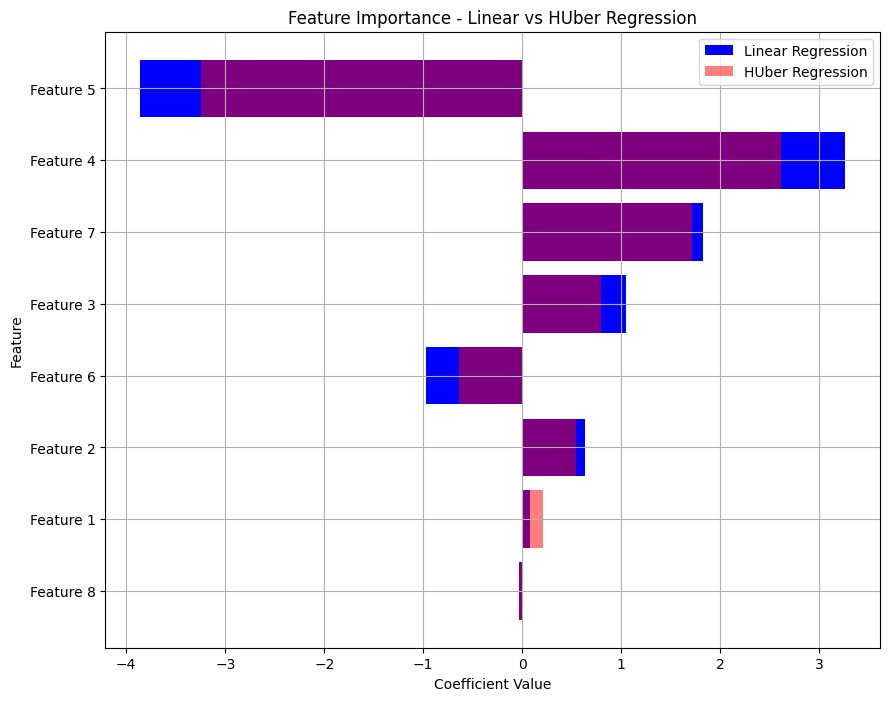

In [164]:
feature_names = [f'Feature {i+1}' for i in range(X_train.shape[1])]

# Coefficients from the linear regression and HUber regression models
coefficients_lr = model.coef_
coefficients_HUber = model_r.coef_

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear Regression': coefficients_lr,
    'HUber Regression': coefficients_HUber
})

# Calculate the absolute values to sort by importance
coefficients_df['Importance'] = np.abs(coefficients_df[['Linear Regression', 'HUber Regression']]).max(axis=1)

# Sort by the calculated importance
coefficients_df = coefficients_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))

# Plot the coefficients
plt.barh(coefficients_df['Feature'], coefficients_df['Linear Regression'], color='blue', label='Linear Regression')
plt.barh(coefficients_df['Feature'], coefficients_df['HUber Regression'], color='red', alpha=0.5, label='HUber Regression')

plt.title('Feature Importance - Linear vs HUber Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend()
plt.grid()
plt.gca().invert_yaxis()  # Invert y-axis to have the largest at the top
plt.show()


In [160]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Length            15000 non-null  float64
 1   Diameter          15000 non-null  float64
 2   Height            15000 non-null  float64
 3   Weight            15000 non-null  float64
 4   Shucked Weight    15000 non-null  float64
 5   Viscera Weight    15000 non-null  float64
 6   Shell Weight      15000 non-null  float64
 7   Sex_LabelEncoded  15000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 937.6 KB


In [172]:
cols2 = ['Shucked Weight', 'Weight', 'Shell Weight', 'Height', 'Viscera Weight', 'Diameter', 'Length']
X = train[cols2]
y = train['Age']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = HuberRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MAE, r2

(np.float64(1.3769059674757886), 0.5701817036726481)

### Feature engeneering

#### Box-Cox transformation

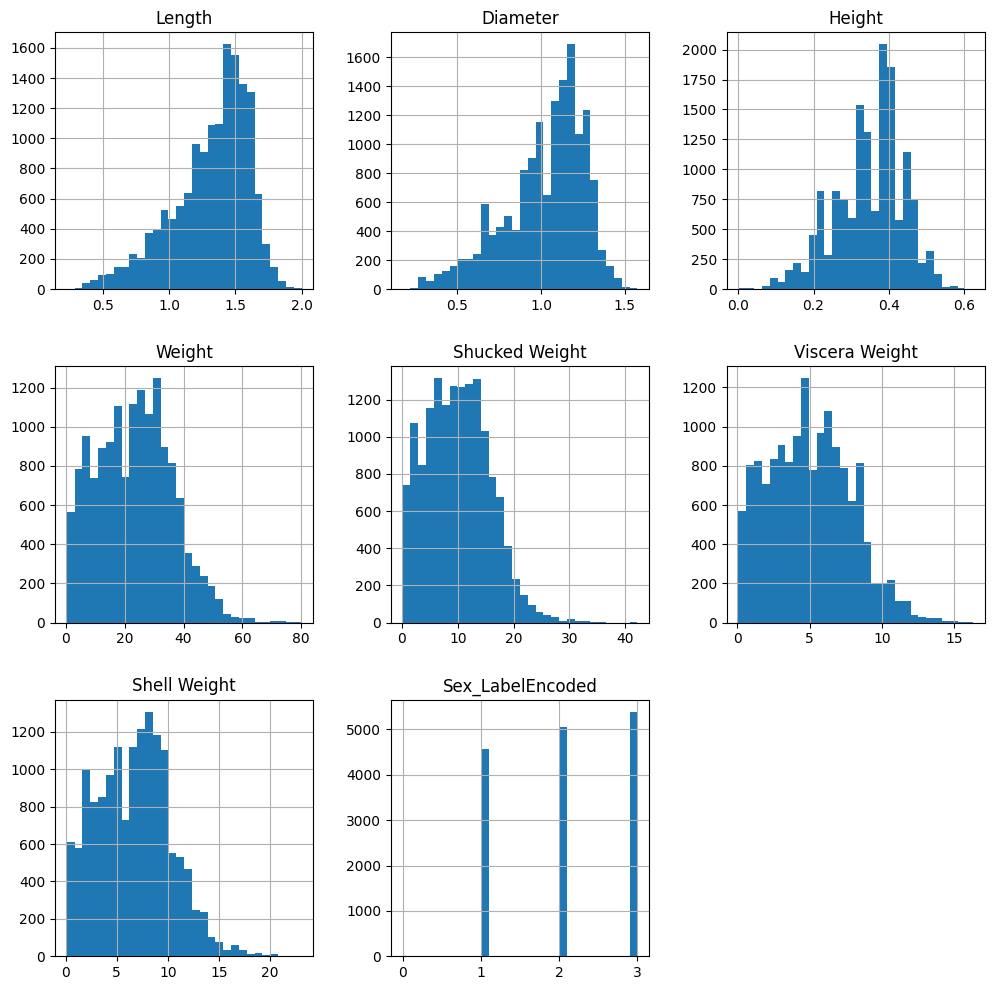

In [198]:
X.hist(bins=30, figsize=(12, 12), layout=(3, 3))
plt.show()

In [199]:
variables = list(X.columns)

variables

['Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'Sex_LabelEncoded']

In [201]:
def make_qqplot(df):

    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i in range(6):

        # location in figure
        ax = plt.subplot(2, 3, i + 1)

        # variable to plot
        var = variables[i]

        # q-q plot
        stats.probplot((df[var]), dist="norm", plot=plt)

        # add variable name as title
        ax.set_title(var)

    plt.show()

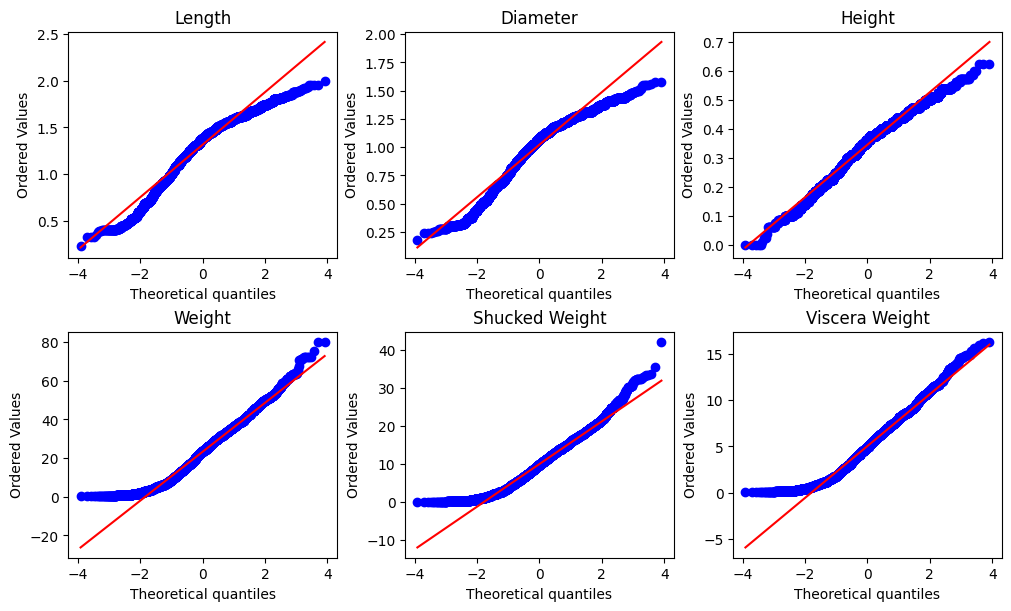

In [202]:
make_qqplot(X)

### Equal-frequency discretization with Scikit-Learn

In [203]:
from sklearn.preprocessing import KBinsDiscretizer

# let's set up a discretizer based on quantiles to sort values in 10 bins

disc = KBinsDiscretizer(n_bins=8, encode="ordinal", strategy="quantile")

# fit the discretizer so that it learns the interval edges
disc.fit(X_train[variables])

KBinsDiscretizer(encode='ordinal', n_bins=8)

In [204]:
# the interval edges are stored in a transformer attribute:

disc.bin_edges_

array([array([0.225 , 0.9375, 1.15  , 1.2875, 1.375 , 1.45  , 1.5375, 1.6125,
              2.    ])                                                       ,
       array([0.175 , 0.7125, 0.8875, 1.    , 1.075 , 1.1375, 1.2   , 1.2625,
              1.575 ])                                                       ,
       array([0.    , 0.225 , 0.2875, 0.325 , 0.3625, 0.3875, 0.4125, 0.4375,
              0.625 ])                                                       ,
       array([ 0.29766975,  7.1157245 , 13.32072131, 18.27125275, 23.700182  ,
              27.8675585 , 32.16250775, 38.11590275, 80.10151225])            ,
       array([ 0.09922325,  3.061746  ,  5.6699    ,  7.824462  ,  9.87980075,
              11.8784405 , 13.9763035 , 16.6978555 , 35.6920205 ])            ,
       array([ 0.0850485 ,  1.54504775,  2.8066005 ,  3.95475525,  4.9044635 ,
               6.010094  ,  7.01650125,  8.4198015 , 16.3009625 ])            ,
       array([ 0.09922325,  2.1262125 ,  3.8271825 ,

In [205]:
# Let's make a copy of the original datasets

train_t = X_train.copy()
test_t = X_test.copy()

In [206]:
# let's transform the variables in train and test sets.

# Remember Scikit-learn returns a NumPy arrays by default.
# Here we assigned the array to the variables in our dataframe
# directly.

train_t[variables] = disc.transform(X_train[variables])
test_t[variables] = disc.transform(X_test[variables])

train_t.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_LabelEncoded
9839,4.0,5.0,7.0,4.0,3.0,4.0,6.0,2.0
9680,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0
7093,7.0,7.0,7.0,7.0,6.0,6.0,7.0,1.0
11293,5.0,5.0,4.0,4.0,4.0,5.0,4.0,1.0
820,3.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0


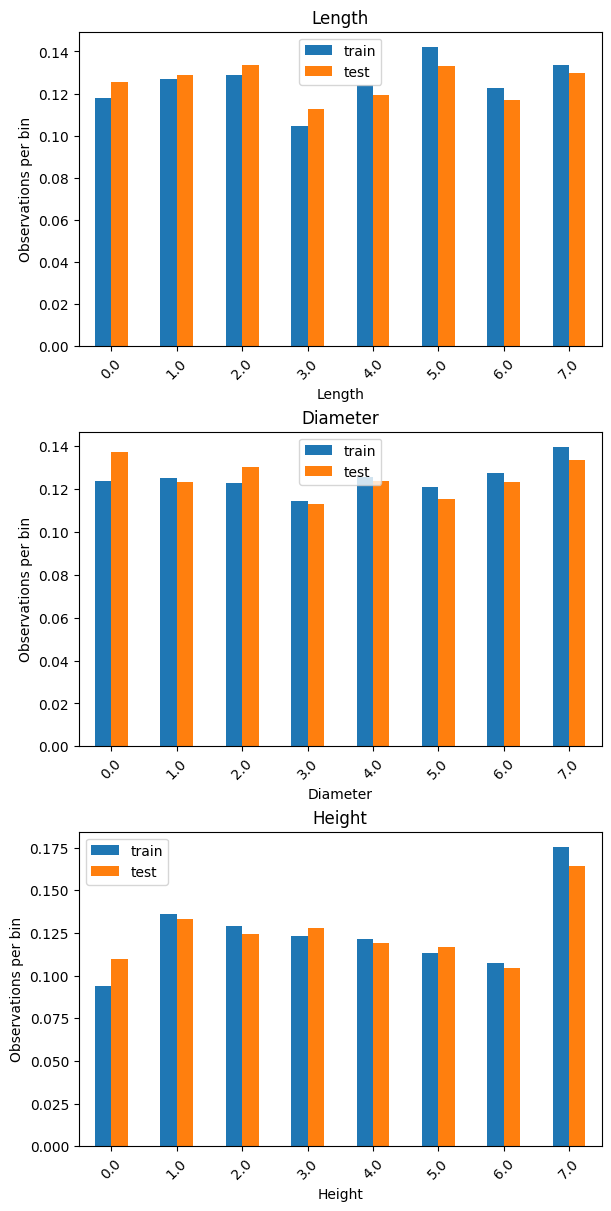

In [207]:
# Let's plot 3 variables:

plt.figure(figsize=(6, 12), constrained_layout=True)

for i in range(3):

    # location in figure
    ax = plt.subplot(3, 1, i + 1)

    # variable to plot
    var = variables[i]

    # determine proportion of observations per bin
    t1 = train_t[var].value_counts(normalize=True)
    t2 = test_t[var].value_counts(normalize=True)

    # concatenate proportions
    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ["train", "test"]

    # order the intervals
    tmp.sort_index(inplace=True)

    tmp.plot.bar(ax=ax)
    plt.xticks(rotation=45)
    plt.ylabel("Observations per bin")

    # add variable name as title
    ax.set_title(var)

plt.show()

## Submission

In [181]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Shucked Weight  15000 non-null  float64
 1   Weight          15000 non-null  float64
 2   Shell Weight    15000 non-null  float64
 3   Height          15000 non-null  float64
 4   Viscera Weight  15000 non-null  float64
 5   Diameter        15000 non-null  float64
 6   Length          15000 non-null  float64
dtypes: float64(7)
memory usage: 820.4 KB


In [180]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   Sex               10000 non-null  object 
 2   Length            10000 non-null  float64
 3   Diameter          10000 non-null  float64
 4   Height            10000 non-null  float64
 5   Weight            10000 non-null  float64
 6   Shucked Weight    10000 non-null  float64
 7   Viscera Weight    10000 non-null  float64
 8   Shell Weight      10000 non-null  float64
 9   Sex_LabelEncoded  10000 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 781.4+ KB


In [234]:
y_pred_test = stacking_regressor.predict(test[cols])


In [235]:
subm['Age'] = y_pred_test
subm

,id,Age
0,15000,6.860456
1,15001,10.735648
2,15002,5.872373
3,15003,9.873515
4,15004,7.075077
...,...,...
9995,24995,9.321942
9996,24996,8.654281
9997,24997,9.916771
9998,24998,8.558731


In [236]:
subm.to_csv("my_submission.csv", index=False)

In [191]:
train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_LabelEncoded
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.314726,1.021937,0.346734,23.276184,10.054437,5.033064,6.664251,9.929533,2.054867
std,4330.271354,0.289503,0.238511,0.091441,12.777945,5.671039,2.835873,3.601877,3.206668,0.812753
min,0.000000,0.225000,0.175000,0.000000,0.297670,0.099223,0.085048,0.099223,1.000000,0.000000
25%,3749.750000,1.150000,0.875000,0.287500,13.168343,5.655725,2.792426,3.827183,8.000000,1.000000
50%,7499.500000,1.375000,1.075000,0.362500,23.515910,9.879801,4.890289,6.803880,9.000000,2.000000
75%,11249.250000,1.537500,1.200000,0.412500,32.162508,13.976304,7.002326,9.071840,11.000000,3.000000
max,14999.000000,2.000000,1.575000,0.625000,80.101512,42.184056,16.300963,23.104843,29.000000,3.000000
